## Project No1 - The Mind

Refer to the `README.md` for further information about how to play the game and the objectives for this first project. 

When writing code, we recommend you to be as modular as possible. For example, if you are running multiple experiments for different choices of parameters, it may be convenient to write a function that does one experiment and then make multiple calls to the same function. Follow the _do not repeat yourself_ rule when writing code! 

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

Let's start by creating a function that generates one sample of the game. Feel free to change this code as you find it suitable, for example by changing how the sampling is created or if you want to sample cards with replacement (this could be useful for the last questions).

In [29]:
def sample_cards(N, n, k):
    """
    Generates a simulated sample of how the cards are shuffled among players. 
    
    
    Arguments: 
        - N : Total number of cards
        - n : Number of players
        - k : Number of cards per player
        
    Returns: 
        - 2D numpy array where each row represent each player and each column their card in ascending order. 
    """
    
    assert n * k <= N, "There are not enough cards for all the players!"
    
    _cards = np.random.choice(a=np.arange(1, N+1), size=n*k, replace=False)
    _cards = _cards.reshape(n,k)
    _cards.sort(axis=1)
    return _cards

Now we can just generate how cards are distributed among players by simply making a call to this function with the desired parameters. 

In [30]:
cards = sample_cards(100, 6, 3)
cards

array([[ 2, 17, 20],
       [51, 58, 72],
       [23, 57, 69],
       [52, 55, 88],
       [54, 74, 95],
       [19, 62, 71]])

and access the cards of each player with 

In [31]:
player0 = cards[0,:]
player1 = cards[1,:]
player0, player1

(array([ 2, 17, 20]), array([51, 58, 72]))

The lowest card in the game is

In [32]:
np.min(cards)

2

In [33]:
np.arange(1, 5)

array([1, 2, 3, 4])

### 1. What is the distribution of the lowest number? 

Repeat the sampling of the cards multiple times for the same choice of `N`, `n` and `k` and plot the distribution of the lowest number in the sample. Use an [histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) to plot the distribution and set the bins to be the available integer number cards. 

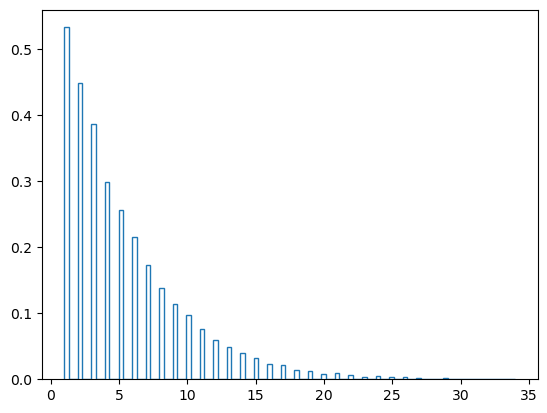

In [34]:
# To Do cell

# Configuration
N = 100
n = 6
k = 3

# Simulation setup
iterations = 10000
np.random.seed(0)
min_vector = np.zeros(iterations)

# Simulation
for i in np.arange(0, iterations):
    min_vector[i] = np.min(sample_cards(N, n, k))

# Plot
counts, bins = np.histogram(min_vector, bins = N, density = True)
plt.stairs(counts, bins)

# Function for future use
def sim_min(N,n,k, iterations, sampling, seed = 0):
    np.random.seed(seed)
    min_vector = np.zeros(iterations)

    # Simulation
    for i in np.arange(0, iterations):
        min_vector[i] = np.min(sampling(N, n, k))

    return min_vector

### 2. What is the distribution of the largest gap?

For each simulation, found the largest distance between consecutive numbers in the game. To make this easy, let us first consider the largest gap among the pool of **all** the cards among players (if the largest gap is happening in the hand of one single player, that is ok). This will make the analysis more simple. 

Average of maximum gap is:  16.9423


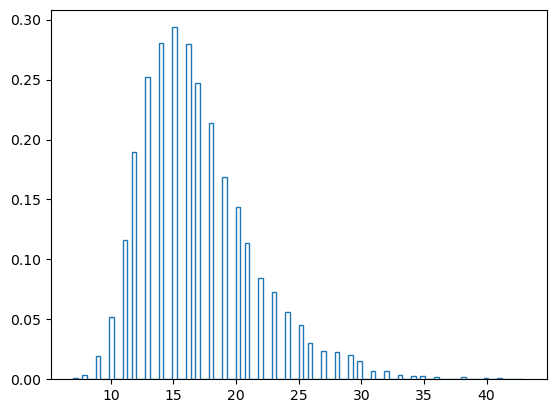

In [35]:
# Configuration
N = 100
n = 6
k = 3

# Function to flatten matrix to vector and sort the vector
def flatsort(x):
    return np.sort(x.flatten())

# Function to calculate the maximum gap between consecutive numbers in a vector
def maxgap(x):
    gaps = np.zeros(len(x)-1)
    for i in np.arange(0, len(x)-1):
        gaps[i] = x[i+1]-x[i]
    return np.max(gaps)

# Simulation setup
iterations = 10000
np.random.seed(0)
max_gaps = np.zeros(iterations)

# Simulation
for i in np.arange(0, iterations):
    max_gaps[i] = maxgap(flatsort(sample_cards(N, n, k)))

# Plot
print("Average of maximum gap is: ", np.mean(max_gaps))
counts, bins = np.histogram(max_gaps, bins = N, density = True)
plt.stairs(counts, bins)


# Function for future use
def sim_max_gap(N,n,k, iterations, sampling, seed = 0):
    np.random.seed(seed)
    max_gaps = np.zeros(iterations)

    # Simulation
    for i in np.arange(0, iterations):
        max_gaps[i] = maxgap(flatsort(sampling(N, n, k)))

    return max_gaps

Repeat the experiment but know compute the largest gap between cards of different players. This is the gap that actually matters for the purposes of the game: what is the maximum number of numbers that a player will have to wait before playing the next card?

Average of maximum gap across players is:  16.3559


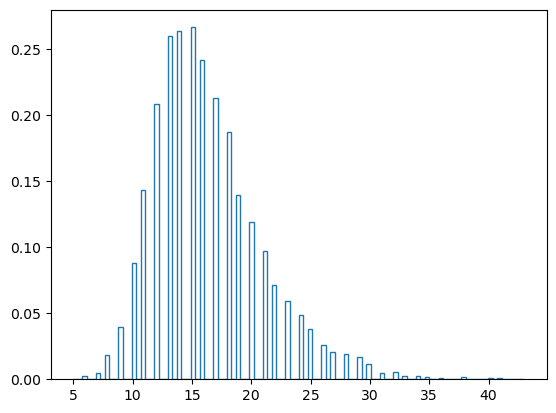

In [36]:
# Configuration
N = 100
n = 6
k = 3

# Function to create player labels for each card
def player_labels(cards):
    n, k = cards.shape
    flattened_cards = cards.flatten()
    player_labels = np.zeros(len(flattened_cards))
    counter = 0
    for player in np.arange(0, n):
        for card in np.arange(0, k):
            player_labels[counter*k+card] = counter + 1
        counter = counter + 1
    return player_labels

# Function to label cards by player
def cards_label_concat(cards):
    player_labs = player_labels(cards)
    flattened_cards = cards.flatten()
    labeled_cards = np.array([flattened_cards, player_labs])
    return labeled_cards

# Function to sort labeled cards
def sort_label(labeled_cards):
    sort_index = np.argsort(labeled_cards[0])
    sorted_labeled_cards = labeled_cards[:,sort_index]
    return sorted_labeled_cards

# Function to determine the maximum gap between cards of different players
def maxgap_crossplayer(sorted_labeled_cards):
    gaps = np.zeros(sorted_labeled_cards.shape[1]-1)
    for i in np.arange(0, sorted_labeled_cards.shape[1]-1):
        if sorted_labeled_cards[1][i+1] == sorted_labeled_cards[1][i]:
            gaps[i] = 0
        else: 
            gaps[i] = sorted_labeled_cards[0][i+1]-sorted_labeled_cards[0][i]
    return np.max(gaps)

# Simulation setup
iterations = 10000
np.random.seed(0)
max_gaps_crossplayer = np.zeros(iterations)

# Simulation
for i in np.arange(0, iterations):
    cards = sample_cards(N, n, k)
    labeled_cards = cards_label_concat(cards)
    sorted_labeled_cards = sort_label(labeled_cards)
    max_gaps_crossplayer[i] = maxgap_crossplayer(sorted_labeled_cards)

# Plot
print("Average of maximum gap across players is: ", np.mean(max_gaps_crossplayer))
counts, bins = np.histogram(max_gaps_crossplayer, bins = N, density = True)
plt.stairs(counts, bins)


# Function for future use
def sim_max_gap_cp(N,n,k, iterations, sampling, seed = 0):
    np.random.seed(seed)
    max_gaps_crossplayer = np.zeros(iterations)
    
    # Simulation
    for i in np.arange(0, iterations):
        cards = sampling(N, n, k)
        labeled_cards = cards_label_concat(cards)
        sorted_labeled_cards = sort_label(labeled_cards)
        max_gaps_crossplayer[i] = maxgap_crossplayer(sorted_labeled_cards)

    return max_gaps_crossplayer

How does these compare? Run simulations for different choices of the number of cards and players and see when the difference between these two is larger. 

Compute the mean of the two distributions. When this difference is larger? How does this depends of the total number of players `n`?

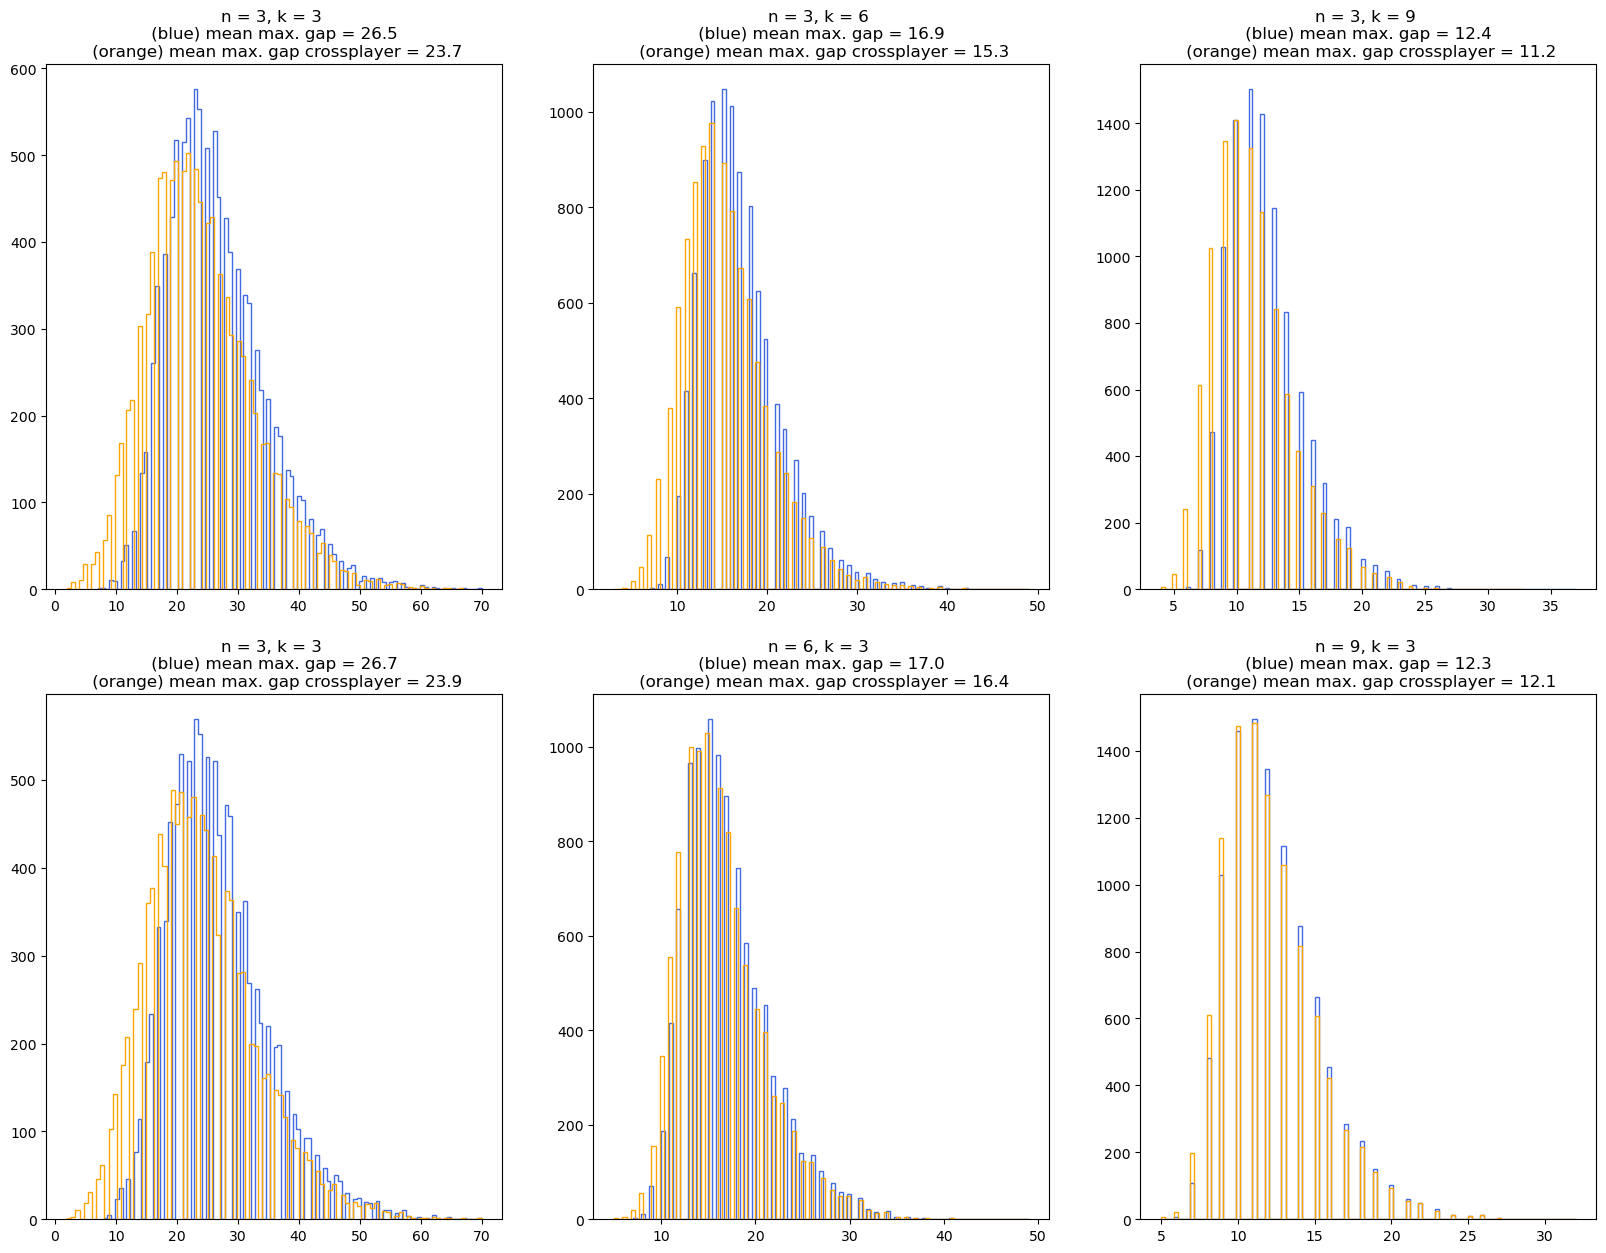

In [37]:
# To Do cell
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize=(20, 15))

# Fixed number of players, varying number of cards
N = 100
n = 3
k_iter = [3, 6, 9]

# Simulation setup
iterations = 10000
np.random.seed(0)

count = 0
for k in k_iter:
    max_gaps = np.zeros(iterations) # max gap
    max_gaps_crossplayer = np.zeros(iterations) # max gap cross player

    for i in np.arange(0, iterations):
        cards = sample_cards(N, n, k)
        max_gaps[i] = maxgap(flatsort(cards))          
        labeled_cards = cards_label_concat(cards) # max gap cross player
        sorted_labeled_cards = sort_label(labeled_cards) # max gap cross player
        max_gaps_crossplayer[i] = maxgap_crossplayer(sorted_labeled_cards) # max gap cross player
                             
                             
    counts_max_gap, bins_max_gap = np.histogram(max_gaps, bins = N)
    _ = ax[0][count].stairs(counts_max_gap, bins_max_gap, color = "royalblue")
                             
    counts_max_gap_c, bins_max_gap_c = np.histogram(max_gaps_crossplayer, bins = N)
    _ = ax[0][count].stairs(counts_max_gap_c, bins_max_gap_c, color = "orange")                         
                             
    ax[0][count].title.set_text("n = %d, k = %d \n (blue) mean max. gap = %.1f \n (orange) mean max. gap crossplayer = %.1f" % (n, k,  np.mean(max_gaps), np.mean(max_gaps_crossplayer)))
    count += 1

# Fixed number of players, varying number of cards
N = 100
n_iter = [3, 6, 9]
k = 3

count = 0
for n in n_iter:
    max_gaps = np.zeros(iterations) # max gap
    max_gaps_crossplayer = np.zeros(iterations) # max gap cross player
    for i in np.arange(0, iterations):
        cards = sample_cards(N, n, k)
        max_gaps[i] = maxgap(flatsort(cards)) # max gap
        labeled_cards = cards_label_concat(cards) # max gap cross player
        sorted_labeled_cards = sort_label(labeled_cards) # max gap cross player
        max_gaps_crossplayer[i] = maxgap_crossplayer(sorted_labeled_cards) # max gap cross player
        
    counts_max_gap, bins_max_gap = np.histogram(max_gaps, bins = N)
    _ = ax[1][count].stairs(counts_max_gap, bins_max_gap, color = "royalblue")
                             
    counts_max_gap_c, bins_max_gap_c = np.histogram(max_gaps_crossplayer, bins = N)
    _ = ax[1][count].stairs(counts_max_gap_c, bins_max_gap_c, color = "orange")                         
                             
    ax[1][count].title.set_text("n = %d, k = 3 \n (blue) mean max. gap = %.1f \n (orange) mean max. gap crossplayer = %.1f" % (n, np.mean(max_gaps), np.mean(max_gaps_crossplayer)))
    count += 1   

### Answer
First, we notice that the average of the largest gap across players is always smaller then the average of the largest gap across all cards. The reason is that we "remove" gaps when calculating the largest gap across players, so the maximum will naturally be smaller. 

Overall, we observe the following: Having few players, we will "take out" many gaps when only looking at gaps across players. This is why the difference between the two distributions is larger, when n is small. On the contrary, having few cards per player but many players, the difference will not be big, as we only "take out" few gaps from the overall number of gaps.

### 3. Deriving distributions

For this section, we are going to use the random sampling generating process from _The Mind_ to investigate and find some familiar distributions.

### 3.1. Binomial Distribution 

Can you think about any way of deriving the binomial distribution? Based on the output of one single game (function `sample_game()`), try to derive something that has Binomial distribution for certain parameter $p$. Run multiple simulations to see this and compare the obtained empirical distribution with the distribution of the binomial distribution (check `numpy.random.binomial` and `scipy.stats.binom`). 

In [38]:
# First, we create a Bernoulli random variable from the event of drawing cards, 
# by asking the question: Is the minimum value equal to 1?

# Configuration
N = 100
n = 6
k = 3
m = 100 #repetitions of bernoulli
thres = 2

def bernoulli(N, n, k, sampling, thres, seed = 0):
    cards = sampling(N, n, k)
    if np.min(cards) < thres:
        return 1
    else: 
        return 0
    
# Next for any number m, we sample cards m times and add the number of successes (when the minimum is less than 5)

def binomial(m, N, n, k, sampling, thres, seed = 0):
    count = 0
    for i in np.arange(m):
        count += bernoulli(N, n, k, sampling, thres)
    return count

# Simulation setup
iterations = 10000

        
def sim_binomial(m, N, n, k, iterations, sampling, thres, seed = 0):
    np.random.seed(seed)
    binom_vec = np.zeros(iterations)
    
    # Simulation
    for i in np.arange(0, iterations):
        binom_vec[i] = binomial(m, N, n, k, sampling, thres)

    return binom_vec

binom_vec = sim_binomial(m, N, n, k, iterations, sample_cards, thres)
    

Average of simulation is:  17.9832
Approximate p (for bernoulli) is:  0.179832
Theoretical p is:  0.18


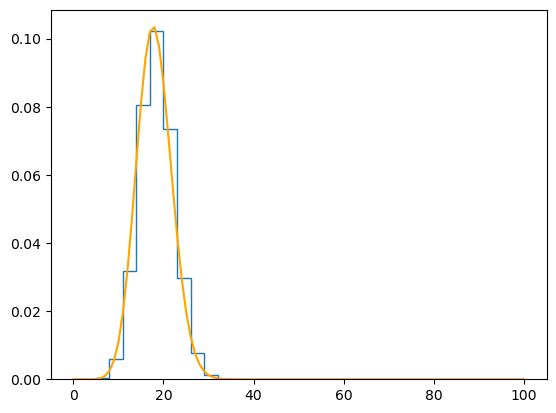

In [39]:
print("Average of simulation is: ", np.mean(binom_vec))
p = np.mean(binom_vec)/m
p_theo = n*k/100
print("Approximate p (for bernoulli) is: ", p)
print("Theoretical p is: ", p_theo)

counts, bins = np.histogram(binom_vec, density = True)
plt.stairs(counts, bins)

x = list(range(m + 1))
y = [sp.stats.binom.pmf(r, m, p_theo) for r in x]

_ = plt.plot(x, y, color = "orange")


### 3.2. Beta Distribution

The [order statistics](https://en.wikipedia.org/wiki/Order_statistic) of the uniform distribution are such that follow a Beta distribution. If well here we are not exactly sampling real numbers in $[0,1]$ following the uniform distribution, you can imagine that sampling one single number without repetition from $\{ 1, 2, 3, \ldots, N \}$ is not very different...

Compare the distribution of the lowest number in the sample (Part 1) with a [Beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) with adequate choices of parameters. In order to do this, notice that the $k$th order statistics of a sample of $n$ uniformly distributed points in $[0,1]$ is $\text{Beta}(k, n+1-k)$ (These $n$ and $k$ are not the same as before, you need to pick the right values of these).

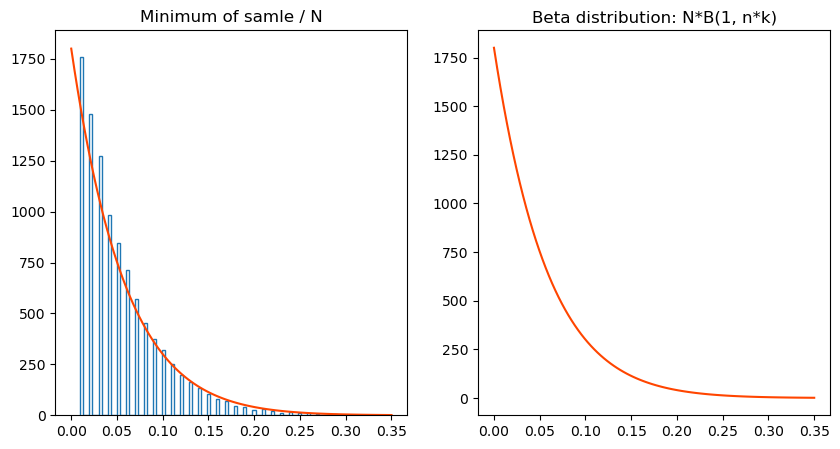

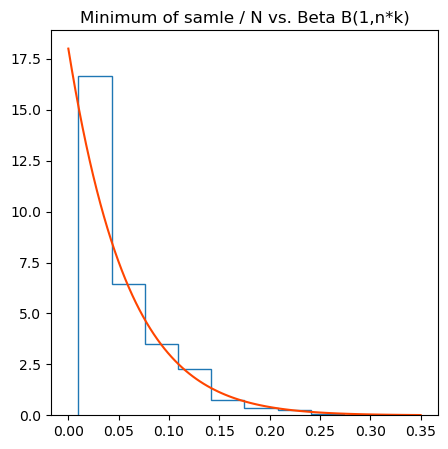

In [40]:
# 3.2
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(10, 5))

# Configuration
N = 100
n = 6
k = 3

# Simulation setup
iterations = 10000
np.random.seed(0)
min_vector = np.zeros(iterations)

# Simulation
for i in np.arange(0, iterations):
    cards = sample_cards(N, n, k)
    min_vector[i] = np.min(cards)
                    
counts, bins = np.histogram(min_vector/N, bins = N)
_ = ax[0].stairs(counts, bins)
ax[0].title.set_text("Minimum of samle / N")  


# Beta function
beta = np.vectorize(lambda x, a, b: 1/(sp.special.beta(a,b)) * x**(a-1) * (1-x)**(b-1))

x = np.linspace(0, 0.35, 100)
a=1 # Lowest number in sample
b=n*k+1-a # total number of cards (= sample size)

y = N*beta(x, a, b)

_ = ax[1].plot(x, y, color = "orangered")
_ = ax[0].plot(x, y, color = "orangered")
ax[1].title.set_text("Beta distribution: N*B(1, n*k)")


fig, ax = plt.subplots(figsize=(5, 5))

counts, bins = np.histogram(min_vector/N, density=True)
_ = ax.stairs(counts, bins)
ax.title.set_text("Minimum of samle / N vs. Beta B(1,n*k)")
y = beta(x, a, b)
_ = ax.plot(x, y, color = "orangered")


### 3.3. Exponential Distribution

If we call $U_1$ the minimum number in the sample (Part 1), then make an histogram with the distribution of the transformed random variable given by 
$$
X = - \ln \left( 1 - \frac{U_1}{N} \right)
$$
and compare this with the distribution of an exponential random variable with parameter $nk$, the total number of cards in the game. 

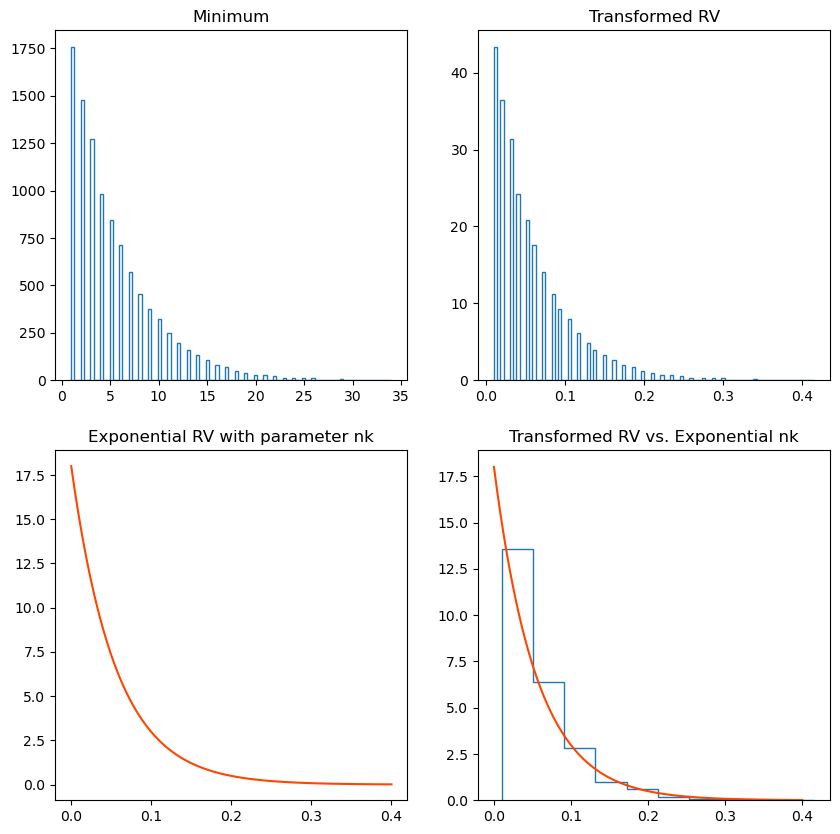

In [41]:
# 3.3
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(10, 10))

# Configuration
N = 100
n = 6
k = 3

# Simulation setup
iterations = 10000
np.random.seed(0)
min_vector = np.zeros(iterations)

# Function X - vectorized
X_Transform = np.vectorize(lambda x, N: -np.log(1-(x/N)))

# Simulation
for i in np.arange(0, iterations):
    cards = sample_cards(N, n, k)
    min_vector[i] = np.min(cards)

X = X_Transform(min_vector, N)

# Plot
counts, bins = np.histogram(min_vector, bins = N)
_ = ax[0][0].stairs(counts, bins)
ax[0][0].title.set_text("Minimum")

counts, bins = np.histogram(X, bins = N, density=True)
_ = ax[0][1].stairs(counts, bins)
ax[0][1].title.set_text("Transformed RV")

counts, bins = np.histogram(X, density=True)
_ = ax[1][1].stairs(counts, bins)
ax[1][1].title.set_text("Transformed RV vs. Exponential nk")


# Compare with RV Exponential with paramter nk
x = np.linspace(0, 0.4, 100)
lamda = n*k
y = lamda * np.exp(-lamda*x)
_ = ax[1][0].plot(x, y, color = "orangered")
ax[1][0].title.set_text("Exponential RV with parameter nk")
_ = ax[1][1].plot(x, y, color = "orangered")


### 4. What happens when $n * k << N$?

Some of the distribution we saw in previous sections are just approximate. Study what happens when we increase the number of cards. Try to understand how the cases of sampling with and without reposition compare as $n * k << N$. What do you expect to see in these cases? When the difference between the two sampling strategies will lead to similar or different results. 

## Answer

Before we start with the experiments, this is what I would expect:

- Sampling with replacement: Sampling with replacement makes the event of drawing one card independent of the other cards. Therefore, I would expect the results to be closer to the "true" distributions that we studied.
- Setting n*k << N: This simulates independence in some form, as the probability of drawing the same number twice decreases with a higher N. So for a higher N, I would expect the results for sampling with and without replacement to be similar.

We set N to be 10,000 and increase the number of iterations to 200,000.
In the following experiments we compare three different simulations:
- Sampling without replacement (Blue)
- Sampling with replacement (Orange)
- Draws from the true distribution (Green)

In [80]:
# Setup

# Configuration
N = 10000
n = 6
k = 3
iterations = 200000
binsize = 15

# sampling with replacement
def sample_cards_replace(N, n, k):
  
    assert n * k <= N, "There are not enough cards for all the players!"
    
    _cards = np.random.choice(a=np.arange(1, N+1), size=n*k, replace=True)
    _cards = _cards.reshape(n,k)
    _cards.sort(axis=1)
    return _cards

(Blue) Mean without replacement:  0.05249
(Orange) Mean with replacement:  0.05270
(Green) Mean Beta distribution:  0.05288


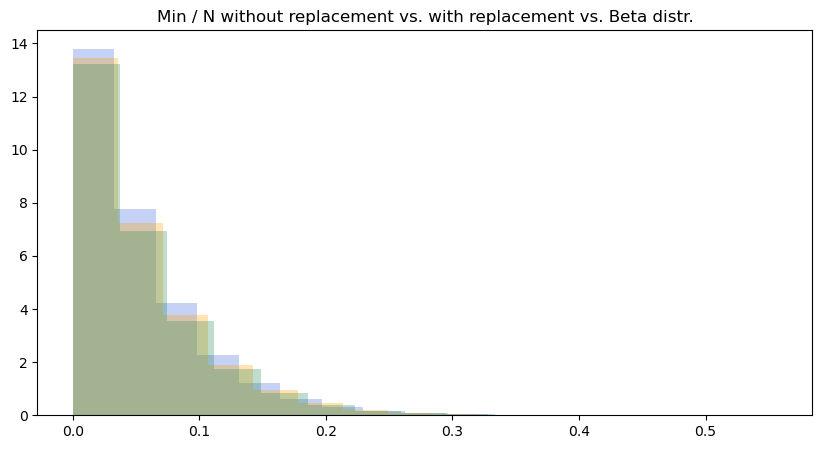

In [81]:
# Beta comparison
import scipy as sp

fig, ax = plt.subplots(figsize=(10, 5))

np.random.seed(0)
min_vector = sim_min(N, n, k, iterations, sample_cards, seed = 0)
np.random.seed(0)
min_vector_replace = sim_min(N, n, k, iterations, sample_cards_replace, seed = 0)
                    
_ = ax.hist(min_vector/N, density = True, alpha = 0.3, color = "royalblue", bins = binsize) 
_ = ax.hist(min_vector_replace/N, density = True, alpha = 0.3, color = "orange", bins = binsize) 

# Beta function
a=1 # Lowest number in sample
b=n*k+1-a # total number of cards (= sample size)
np.random.seed(0)
y = np.random.beta(a, b, iterations)
_ = ax.hist(y, density = True, alpha = 0.3, color = "seagreen", bins = binsize) 
ax.title.set_text("Min / N without replacement vs. with replacement vs. Beta distr.")

print("(Blue) Mean without replacement:  %.5f" % (np.mean(min_vector)/N))
print("(Orange) Mean with replacement:  %.5f" % (np.mean(min_vector_replace)/N))
print("(Green) Mean Beta distribution:  %.5f" % (np.mean(y)))

(Blue) Mean without replacement: 0.05540
(Orange) Mean with replacement: 0.05563
(Green) Mean Beta distribution: 0.05572


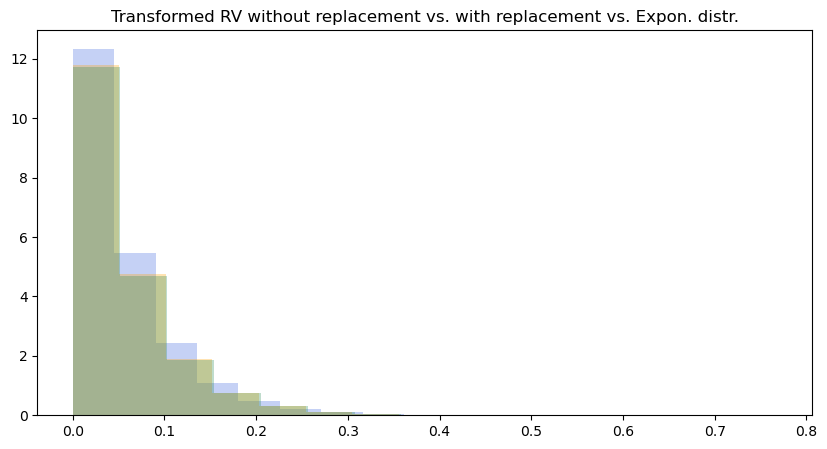

In [82]:
# Exponential
import scipy as sp

fig, ax = plt.subplots(figsize=(10, 5))

# Function X - vectorized
X_Transform = np.vectorize(lambda x, N: -np.log(1-(x/N)))

np.random.seed(0)
min_vector = sim_min(N, n, k, iterations, sample_cards, seed = 0)
np.random.seed(0)
min_vector_replace = sim_min(N, n, k, iterations, sample_cards_replace, seed = 0)

X = X_Transform(min_vector, N)
X_replace = X_Transform(min_vector_replace, N)
                    
_ = ax.hist(X, density = True, alpha = 0.3, color = "royalblue", bins = binsize) 
_ = ax.hist(X_replace, density = True, alpha = 0.3, color = "orange", bins = binsize) 

# Exponenatial function
np.random.seed(0)
y = np.random.exponential(1/(n*k), iterations)
_ = ax.hist(y, density = True, alpha = 0.3, color = "seagreen", bins = binsize) 
ax.title.set_text("Transformed RV without replacement vs. with replacement vs. Expon. distr.")

print("(Blue) Mean without replacement: %.5f" %(np.mean(X)))
print("(Orange) Mean with replacement: %.5f" %(np.mean(X_replace)))
print("(Green) Mean Beta distribution: %.5f" %(np.mean(y)))

## Answer cont.


The visual observation we can make for the Beta distribution and the exponential distribution is that the green (true distribution) and orange (sampling with replacement) histograms seem to be closer compared to the blue (sampling without replacement) and the green one. This matches our above stated expectation. This is also reflected in the calculated distribution means.

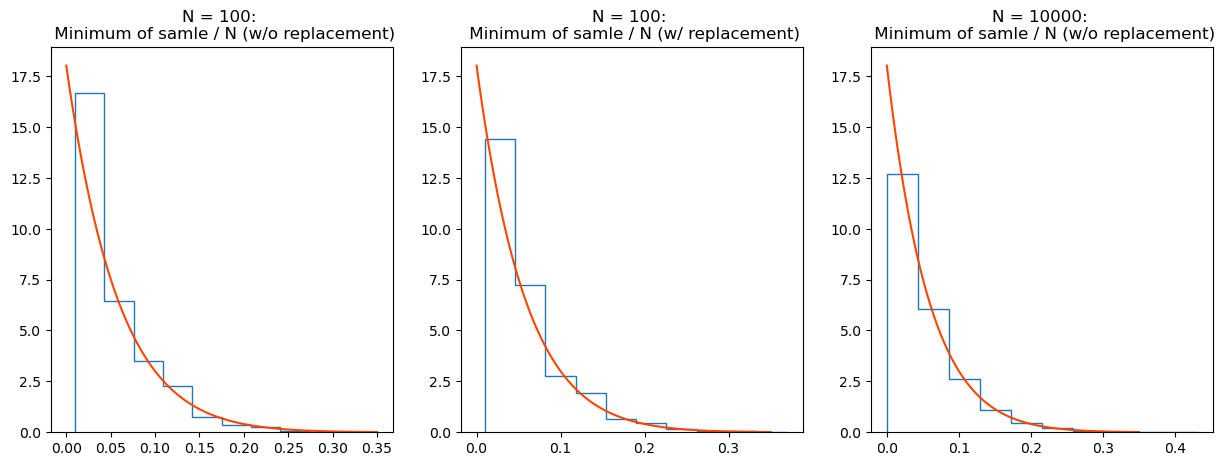

In [83]:
# 3.2
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(15, 5))

# Configuration
N = 100
n = 6
k = 3

# Simulation setup
iterations = 10000
np.random.seed(0)

# Beta function
beta = np.vectorize(lambda x, a, b: 1/(sp.special.beta(a,b)) * x**(a-1) * (1-x)**(b-1))

x = np.linspace(0, 0.35, 100)
a=1 # Lowest number in sample
b=n*k+1-a # total number of cards (= sample size)

min_vector = sim_min(N, n, k, iterations, sample_cards, seed = 0)              
counts, bins = np.histogram(min_vector/N, density = True)
_ = ax[0].stairs(counts, bins)
ax[0].title.set_text(f"N = {N}: \n Minimum of samle / N (w/o replacement)") 
y = beta(x, a, b)
_ = ax[0].plot(x, y, color = "orangered")

N = 100
min_vector = sim_min(N, n, k, iterations, sample_cards_replace, seed = 0)
counts, bins = np.histogram(min_vector/N, density = True)
_ = ax[1].stairs(counts, bins)
ax[1].title.set_text(f"N = {N}: \n Minimum of samle / N (w/ replacement)") 
y = beta(x, a, b)
_ = ax[1].plot(x, y, color = "orangered")

N = 10000
min_vector = sim_min(N, n, k, iterations, sample_cards, seed = 0)
counts, bins = np.histogram(min_vector/N, density = True)
_ = ax[2].stairs(counts, bins)
ax[2].title.set_text(f"N = {N}: \n Minimum of samle / N (w/o replacement)") 
y = beta(x, a, b)
_ = ax[2].plot(x, y, color = "orangered")

### Answer cont.

Lastly we look again at the beta distribution and compare sampling with and without replacement for a lower N (N=100). We also plot the result for N = 10,000.
We immediately see, that sampling with replacement (N=100) is closer to the result without replacement and high N (N=10,000) as the result without replacement and low N (N=100).

### Contribution statement

Please include a list of the students you work with along this project (including yourself). Include both names and GitHub usernames of the people you collaborated with. Maximum of three persons per group. 
- Member No1: Isabel Moreno
- Member No2: Max Medina
- Member No3: